In [155]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [156]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from matplotlib import cm
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.covariance import ShrunkCovariance, LedoitWolf
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [221]:
wine_dataset = pd.read_csv("wine_dataset.csv")
ufc_dataset = pd.read_csv("ufc_data.csv")
ufc_dataset.loc[ufc_dataset["Winner"] == "Red", "Winner"] = 1
ufc_dataset.loc[ufc_dataset["Winner"] == "Blue", "Winner"] = 0
ufc_dataset.drop(["no_of_rounds"], axis=1 ,inplace=True)
# al zero
ufc_dataset.drop(["B_draw"], axis=1 ,inplace=True)
ufc_dataset.drop(["R_draw"], axis=1 ,inplace=True)

ufcX = ufc_dataset.drop("Winner", 1).copy().values
ufcY = ufc_dataset["Winner"].copy().values
ufc_x_df = ufc_dataset.drop("Winner",1)

wineX = wine_dataset.drop("class", 1).copy().values
wineY = wine_dataset["class"].copy().values
wine_x_df = wine_dataset.drop("class",1)


min_max_scaler = preprocessing.MinMaxScaler()
ufcX = min_max_scaler.fit_transform(ufcX)
ufcX_df = pd.DataFrame(ufcX, columns=ufc_x_df.columns)
wineX = min_max_scaler.fit_transform(wineX)
wineX_df = pd.DataFrame(wineX, columns=wine_x_df.columns)

In [222]:
ufc_dataset.shape

(3592, 157)

In [158]:
ufcX.shape
dims_ufc = list(range(2,150,1))

In [150]:
for dim in dims_ufc:
    pca = PCA(n_components=dim, random_state=44)
    pca.fit_transform(ufcX_df.values)
    
    # reconstruction
    x_prime = pca.fit_transform(ufcX_df.values)
    A = np.linalg.pinv(pca.components_.T)
    reconstructed = np.dot(x_prime, A)
    rc_err = mean_squared_error(ufcX_df.values, reconstructed)    
        
    print(dim, ": ", sum(pca.explained_variance_ratio_), rc_err)

2 :  0.24496622100512128 0.06414621805018135
3 :  0.3567321873634959 0.060265559207996
4 :  0.4319877606127273 0.05765258841492883
5 :  0.498578034262166 0.055340488026402325
6 :  0.5591546877403187 0.053237188304587
7 :  0.615248755346132 0.051289529759313446
8 :  0.6603933886812262 0.049722049727267695
9 :  0.7029298963310998 0.04824512719077862
10 :  0.7372642706924405 0.047052993325725156
11 :  0.7541729819158255 0.04646590101259125
12 :  0.7687426943376495 0.04596002176168799
13 :  0.7830271780022783 0.04546404602197627
14 :  0.7953445374114857 0.04503637137949651
15 :  0.807185207692011 0.04462524799982489
16 :  0.8177355403461759 0.04425892681067955
17 :  0.8276859684696731 0.04391343508239108
18 :  0.8360810043830993 0.043621948582436024
19 :  0.8440947374840222 0.04334370140907649
20 :  0.851514458758826 0.04308607909425401
21 :  0.8584952417316578 0.0428436972847322
22 :  0.8649723599062511 0.042618803368139384
23 :  0.8710451478610624 0.04240794831949254
24 :  0.876305297970

In [165]:
comp = 72
pca = PCA(n_components=comp, random_state=44)
pca_result = pca.fit_transform(ufcX_df.values)
for i in range(comp):
    field_name = "pca-"+str(i)
    ufcX_df[field_name] = pca_result[:,i]
    ufc_dataset[field_name] = pca_result[:,i]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
sum(pca.explained_variance_ratio_)
ufcX_pca_72 = pca_result

Explained variation per principal component: [0.10387952 0.09428839 0.09041421 0.06087876 0.05386888 0.0490041
 0.04537787 0.03652021 0.03441034 0.02777514 0.02735695 0.02357267
 0.02311112 0.01992851 0.01915731 0.01706954 0.01610527 0.01359754
 0.01298393 0.01198215 0.01131536 0.01049971 0.00981854 0.0085123
 0.00764958 0.00734817 0.00700898 0.00643384 0.00622643 0.00580744
 0.00566303 0.0053394  0.0051754  0.00496568 0.00472896 0.00470317
 0.00443494 0.0042916  0.00410299 0.00390684 0.00383384 0.0037414
 0.00354056 0.00344512 0.00343162 0.00328813 0.00320825 0.00313513
 0.00309243 0.00296816 0.00291936 0.00274538 0.00268919 0.00261547
 0.00259177 0.00254196 0.00244838 0.00229541 0.00220902 0.00214071
 0.00206514 0.00201619 0.00192084 0.00191154 0.00186863 0.001766
 0.00172775 0.00164547 0.00164073 0.00161035 0.00152783 0.00146633]


In [160]:
ufcX_df.head()

,title_bout,B_current_lose_streak,B_current_win_streak,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,...,pca-62,pca-63,pca-64,pca-65,pca-66,pca-67,pca-68,pca-69,pca-70,pca-71
0,1.0,0.0,0.333333,0.187755,0.153846,0.002299,0.000000,0.230996,0.158462,0.029545,...,-0.057992,-0.032779,-0.033508,0.047101,-0.026125,-0.085337,-0.010317,0.035434,0.017178,-0.004772
1,1.0,0.0,0.250000,0.297959,0.233333,0.135632,0.107353,0.460148,0.323846,0.027273,...,0.009546,0.009956,0.080867,0.187809,-0.014888,-0.105616,-0.094324,-0.138320,-0.086301,-0.196701
2,0.0,0.0,0.250000,0.313364,0.290323,0.077494,0.064516,0.312701,0.296774,0.062683,...,0.102658,-0.002429,-0.011548,0.073082,-0.101303,-0.017988,0.090923,-0.144120,0.065890,-0.007119
3,0.0,0.0,0.333333,0.346939,0.358974,0.158046,0.161765,0.404059,0.375000,0.147727,...,0.069069,-0.003816,-0.045949,-0.026635,-0.073795,-0.038040,0.078177,0.053118,0.094801,-0.014854
4,0.0,0.0,0.083333,0.346939,0.371795,0.028736,0.029412,0.741697,0.457692,0.000000,...,0.002939,-0.012160,-0.026635,-0.042962,0.072853,0.103789,-0.144943,-0.028144,0.153259,0.121973


In [161]:
rndperm = np.random.permutation(ufc_dataset.shape[0])


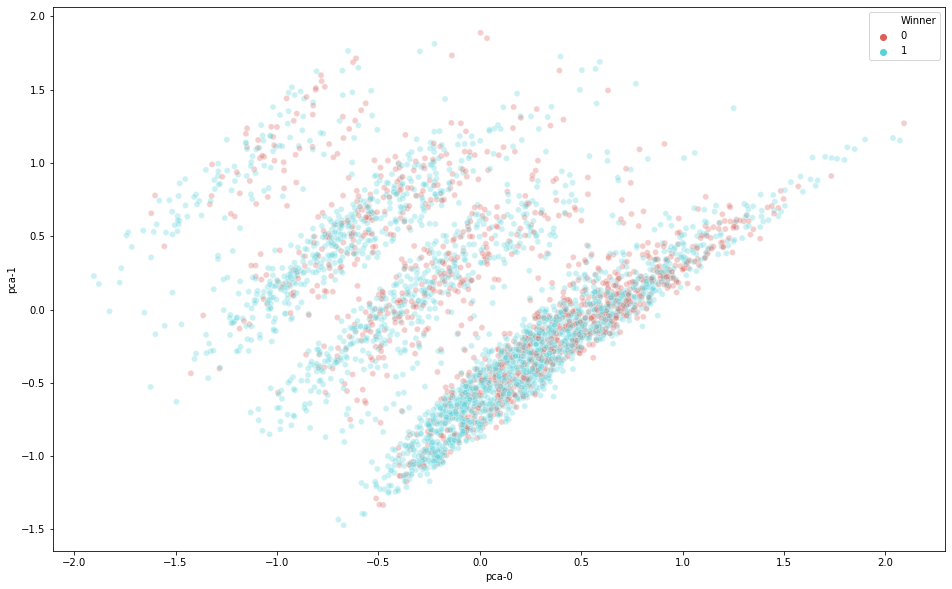

In [162]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-0", y="pca-1",
    hue="Winner",
    palette=sns.color_palette("hls", 2),
    data=ufc_dataset,
    legend="full",
    alpha=0.3
)

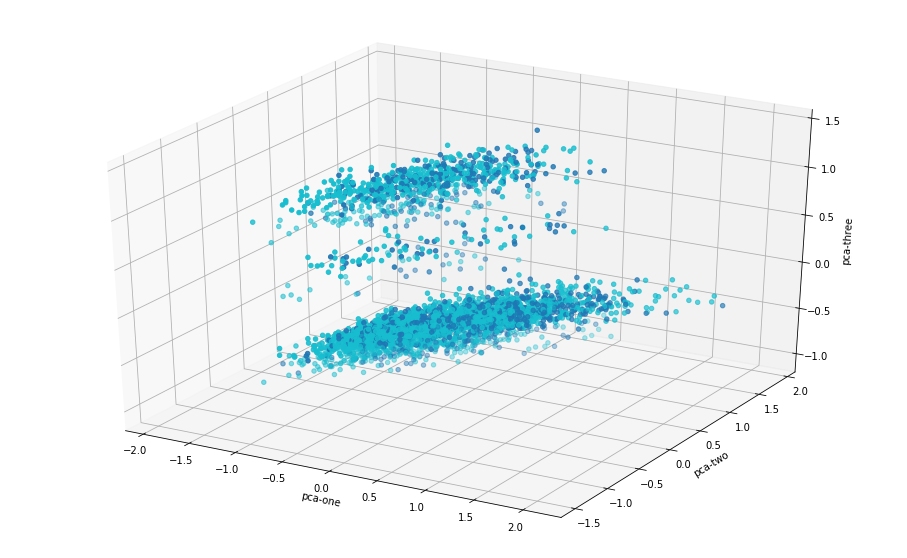

In [163]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=ufc_dataset.loc[rndperm,:]["pca-0"], 
    ys=ufc_dataset.loc[rndperm,:]["pca-1"], 
    zs=ufc_dataset.loc[rndperm,:]["pca-2"], 
    c=ufc_dataset.loc[rndperm,:]["Winner"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

## UFC Clustering on DR

In [169]:
from sklearn.cluster import KMeans
clusters = list(range(2,31,1))

For n_clusters=2, The Silhouette Coefficient is 0.12824786225192325
For n_clusters=2, The homogeneity_score is 0.0008529556471571547
For n_clusters=3, The Silhouette Coefficient is 0.1287273740282547
For n_clusters=3, The homogeneity_score is 0.0011112065802657525
For n_clusters=4, The Silhouette Coefficient is 0.09529090350978711
For n_clusters=4, The homogeneity_score is 0.005120238505029884
For n_clusters=5, The Silhouette Coefficient is 0.0903401556742284
For n_clusters=5, The homogeneity_score is 0.005712919216198488
For n_clusters=6, The Silhouette Coefficient is 0.09286183986678087
For n_clusters=6, The homogeneity_score is 0.006443128018253993
For n_clusters=7, The Silhouette Coefficient is 0.10111836851662773
For n_clusters=7, The homogeneity_score is 0.00707254319278381
For n_clusters=8, The Silhouette Coefficient is 0.10458478873589729
For n_clusters=8, The homogeneity_score is 0.007480707798403517
For n_clusters=9, The Silhouette Coefficient is 0.12146496773368964
For n_clu

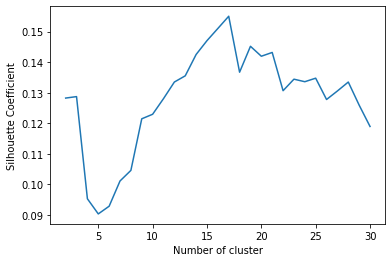

In [172]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, homogeneity_score
silh = {}
homog = {}
for cluster in clusters:
    kmeans = KMeans(n_clusters=cluster, n_init=50, max_iter=1000, random_state=44, n_jobs=-2).fit(ufcX_pca_72)
    label = kmeans.labels_
    sil_coeff = silhouette_score(ufcX_pca_72, label, metric='euclidean')
    homog_score = homogeneity_score(ufcY, label)
    silh[cluster] = sil_coeff
    homog[cluster] = homog_score
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(cluster, sil_coeff))
    print("For n_clusters={}, The homogeneity_score is {}".format(cluster, homog_score))
plt.figure()
plt.plot(list(silh.keys()), list(silh.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")
plt.show()

For n_clusters=2, The Silhouette Coefficient is 0.07067124734080464
For n_clusters=2, The homogeneity_score is 0.00470392593064499
For n_clusters=2, The log_likelihood score is 16.026026859646006
For n_clusters=3, The Silhouette Coefficient is 0.08907763171278366
For n_clusters=3, The homogeneity_score is 0.003213174427036772
For n_clusters=3, The log_likelihood score is 19.608465663302393
For n_clusters=4, The Silhouette Coefficient is 0.08725412082230244
For n_clusters=4, The homogeneity_score is 0.006071852921049764
For n_clusters=4, The log_likelihood score is 26.280800944550283
For n_clusters=5, The Silhouette Coefficient is 0.09603645618249326
For n_clusters=5, The homogeneity_score is 0.006791419423822889
For n_clusters=5, The log_likelihood score is 31.301235409144947
For n_clusters=6, The Silhouette Coefficient is 0.08309608115478126
For n_clusters=6, The homogeneity_score is 0.008212608327095921
For n_clusters=6, The log_likelihood score is 32.48577395168666
For n_clusters=7,

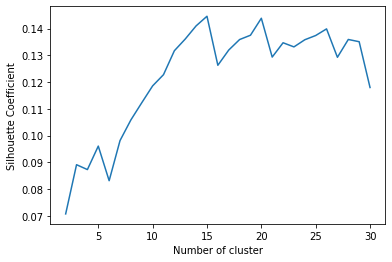

In [174]:
from sklearn.mixture import GaussianMixture
silh_EM = {}
homog_EM = {}
log_likelihood_EM = {}
for cluster in clusters:
    gmm = GaussianMixture(n_components=cluster, max_iter=100, random_state=44, 
                          n_init=5).fit(ufcX_pca_72)
    label = gmm.predict(ufcX_pca_72)
    sil_coeff = silhouette_score(ufcX_pca_72, label, metric='euclidean')
    homog_score = homogeneity_score(ufcY, label)
    silh_EM[cluster] = sil_coeff
    homog_EM[cluster] = homog_score
    log_likelihood_EM[cluster] = gmm.score(ufcX_pca_72)
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(cluster, sil_coeff))
    print("For n_clusters={}, The homogeneity_score is {}".format(cluster, homog_score))
    print("For n_clusters={}, The log_likelihood score is {}".format(cluster, log_likelihood_EM[cluster]))

    
plt.figure()
plt.plot(list(silh_EM.keys()), list(silh_EM.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")
plt.show()

# WINE DATASET

In [137]:
dims_wine = list(range(1,14,1))

In [153]:
for dim in dims_wine:
    pca = PCA(n_components=dim)
    pca.fit_transform(wineX_df.values)
    
    # reconstruction
    x_prime = pca.fit_transform(wineX_df.values)
    A = np.linalg.pinv(pca.components_.T)
    reconstructed = np.dot(x_prime, A)
    rc_err = mean_squared_error(wineX_df.values, reconstructed)    
    
    print(dim, ": ", sum(pca.explained_variance_ratio_), rc_err)

1 :  0.3864929334445718 0.15600332678840306
2 :  0.5492527406426233 0.14482001434026903
3 :  0.6368271724499169 0.13880272880627353
4 :  0.7044286846532664 0.13415779314340132
5 :  0.7695367430269057 0.12968418401213863
6 :  0.8327513876013592 0.12534067234458318
7 :  0.8859656791467456 0.12168429022357188
8 :  0.9360215668267163 0.11824492370286438
9 :  0.9514373759592895 0.11718569530281736
10 :  0.9658381400553094 0.1161962111841632
11 :  0.9792126996891094 0.11527723811694301
12 :  0.9903440456679683 0.11451239744655323
13 :  1.0000000000000004 0.11384893171666192


In [175]:
pca = PCA(n_components=8)
pca_result = pca.fit_transform(wineX_df.values)
for i in range(8):
    field_name = "pca-"+str(i)
    wineX_df[field_name] = pca_result[:,i]
    wine_dataset[field_name] = pca_result[:,i]
wineX_pca_8 = pca_result
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.28106298 0.15781489 0.08491377 0.06554767 0.06312997 0.06129408
 0.05159755 0.04853511]


In [142]:
rndperm = np.random.permutation(wine_dataset.shape[0])


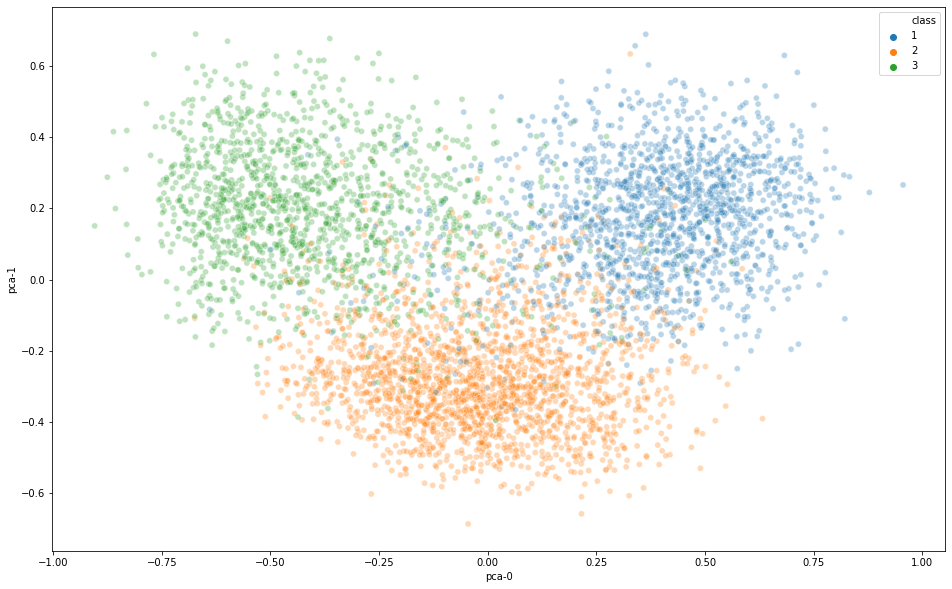

In [143]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-0", y="pca-1",
    hue="class",
    palette=sns.color_palette("tab10", 3),
    data=wine_dataset,
    legend="full",
    alpha=0.3
)

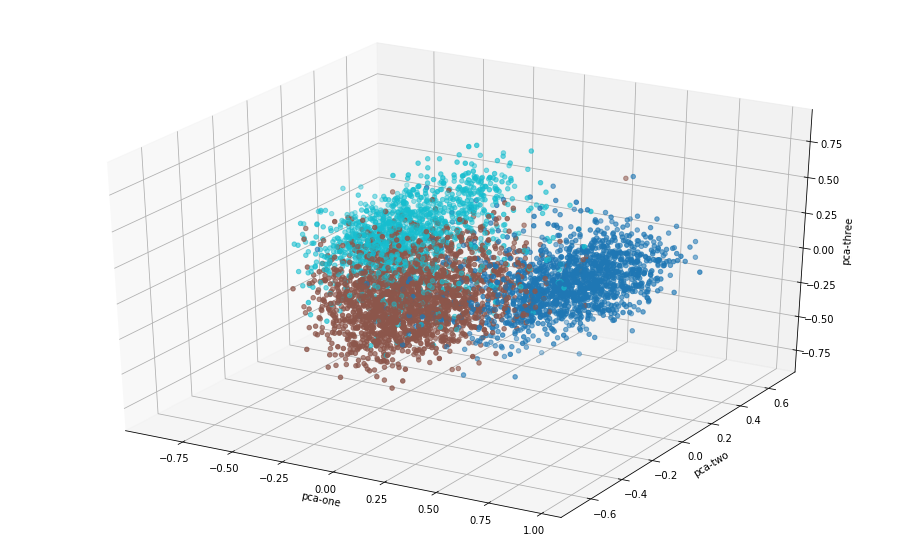

In [144]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=wine_dataset.loc[rndperm,:]["pca-0"], 
    ys=wine_dataset.loc[rndperm,:]["pca-1"], 
    zs=wine_dataset.loc[rndperm,:]["pca-2"], 
    c=wine_dataset.loc[rndperm,:]["class"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

## Wine Clustering on PCA

For n_clusters=2, The Silhouette Coefficient is 0.22191634570539417
For n_clusters=2, The homogeneity_score is 0.28719611638843134
For n_clusters=3, The Silhouette Coefficient is 0.24153317221238194
For n_clusters=3, The homogeneity_score is 0.6480287503680378
For n_clusters=4, The Silhouette Coefficient is 0.1967145989220987
For n_clusters=4, The homogeneity_score is 0.6446542150864878
For n_clusters=5, The Silhouette Coefficient is 0.18280568016067922
For n_clusters=5, The homogeneity_score is 0.6595104672566073
For n_clusters=6, The Silhouette Coefficient is 0.13949274264112868
For n_clusters=6, The homogeneity_score is 0.6635874818893963
For n_clusters=7, The Silhouette Coefficient is 0.13885095799943148
For n_clusters=7, The homogeneity_score is 0.6658408347270299
For n_clusters=8, The Silhouette Coefficient is 0.12882867167769102
For n_clusters=8, The homogeneity_score is 0.6598524372150818
For n_clusters=9, The Silhouette Coefficient is 0.12583916585813984
For n_clusters=9, The 

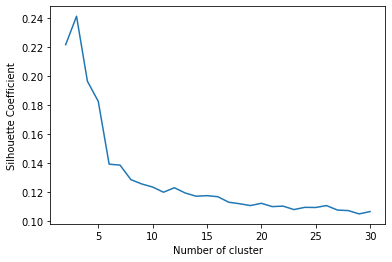

In [176]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, homogeneity_score
silh_wine = {}
homog_wine = {}
for cluster in clusters:
    kmeans = KMeans(n_clusters=cluster, n_init=50, max_iter=1000, random_state=44, n_jobs=-2).fit(wineX_pca_8)
    label = kmeans.labels_
    sil_coeff = silhouette_score(wineX_pca_8, label, metric='euclidean')
    homog_score = homogeneity_score(wineY, label)
    silh_wine[cluster] = sil_coeff
    homog_wine[cluster] = homog_score
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(cluster, sil_coeff))
    print("For n_clusters={}, The homogeneity_score is {}".format(cluster, homog_score))
plt.figure()
plt.plot(list(silh_wine.keys()), list(silh_wine.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")
plt.show()

For n_clusters=2, The Silhouette Coefficient is 0.1564074528567423
For n_clusters=2, The homogeneity_score is 0.2145728919883678
For n_clusters=2, The log_likelihood score is 1.8404783328062426
For n_clusters=3, The Silhouette Coefficient is 0.23482822165147685
For n_clusters=3, The homogeneity_score is 0.646335307327911
For n_clusters=3, The log_likelihood score is 1.85141714060563
For n_clusters=4, The Silhouette Coefficient is 0.17318883666283322
For n_clusters=4, The homogeneity_score is 0.5562337342080294
For n_clusters=4, The log_likelihood score is 2.1358219222364174
For n_clusters=5, The Silhouette Coefficient is 0.14869334413088872
For n_clusters=5, The homogeneity_score is 0.5914011695499368
For n_clusters=5, The log_likelihood score is 2.22231968594994
For n_clusters=6, The Silhouette Coefficient is 0.11251865868512073
For n_clusters=6, The homogeneity_score is 0.655160001715735
For n_clusters=6, The log_likelihood score is 2.268652973070174
For n_clusters=7, The Silhouette 

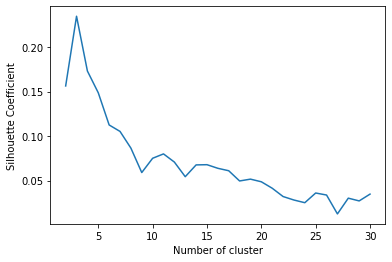

In [177]:
from sklearn.mixture import GaussianMixture
silh_wine_EM = {}
homog__wine_EM = {}
log_likelihood_wine_EM = {}
for cluster in clusters:
    gmm = GaussianMixture(n_components=cluster, max_iter=100, random_state=44, 
                          n_init=5).fit(wineX_pca_8)
    label = gmm.predict(wineX_pca_8)
    sil_coeff = silhouette_score(wineX_pca_8, label, metric='euclidean')
    homog_score = homogeneity_score(wineY, label)
    silh_wine_EM[cluster] = sil_coeff
    homog__wine_EM[cluster] = homog_score
    log_likelihood_wine_EM[cluster] = gmm.score(wineX_pca_8)
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(cluster, sil_coeff))
    print("For n_clusters={}, The homogeneity_score is {}".format(cluster, homog_score))
    print("For n_clusters={}, The log_likelihood score is {}".format(cluster, log_likelihood_wine_EM[cluster]))
plt.figure()
plt.plot(list(silh_wine_EM.keys()), list(silh_wine_EM.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")
plt.show()

## Neural Network on PCA

In [183]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
from sklearn.neural_network import MLPClassifier
neural_net = MLPClassifier()
neural_net.fit(wineX_pca_8, wineY)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [184]:
# first net results
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report
ufc_train_predictions = neural_net.predict(wineX_pca_8)
accuracy = accuracy_score(wineY, ufc_train_predictions)
print(accuracy)
print(classification_report(wineY, ufc_train_predictions))

0.933
              precision    recall  f1-score   support

           1       0.94      0.93      0.93      1577
           2       0.93      0.94      0.93      2013
           3       0.93      0.93      0.93      1410

    accuracy                           0.93      5000
   macro avg       0.93      0.93      0.93      5000
weighted avg       0.93      0.93      0.93      5000



In [185]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(neural_net, wineX_pca_8, wineY,
                         scoring="f1_weighted", cv=10)
scores, scores.mean()

(array([0.91603402, 0.91201529, 0.91424642, 0.92202993, 0.93404559,
        0.92605449, 0.94405819, 0.91405435, 0.92413269, 0.93403525]),
 0.9240706218575738)

In [207]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(wineX_pca_8, 
                                                    wineY, 
                                                    test_size=0.33, 
                                                    random_state=42,
                                                    stratify=wineY)

In [204]:
# stratified cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

def stratFold(train_X_all, train_y_all, classifier, metric, average=None,
              fold=5):
    train_metric, val_metric, indices = [], [], []
    for m in range(100, len(train_X_all), 100):
        train_X = train_X_all[:m]
        train_y = train_y_all[:m]
        skfolds = StratifiedKFold(n_splits=fold)
        metric_list = []
        metric_list_train = []
        for train_index, test_index in skfolds.split(train_X, train_y):
            train_X_folds = train_X[train_index, :]
            train_y_folds = train_y[train_index]
            test_X_fold = train_X[test_index, :]
            test_y_fold = train_y[test_index]
            classifier.fit(train_X_folds, train_y_folds)
            train_y_folds_pred = classifier.predict(train_X_folds)
            test_y_fold_pred = classifier.predict(test_X_fold)
            if average:
                metric_list.append(metric(test_y_fold, test_y_fold_pred,
                                     average=average))
                metric_list_train.append(metric(train_y_folds, train_y_folds_pred, 
                                            average=average))
            else:
                metric_list.append(metric(test_y_fold, test_y_fold_pred))
                metric_list_train.append(metric(train_y_folds, train_y_folds_pred))
                
        test_avg = sum(metric_list)/len(metric_list)
        train_avg = sum(metric_list_train)/len(metric_list_train)
        val_metric.append(test_avg)
        train_metric.append(train_avg)
        indices.append(m)
    
    return train_metric, val_metric, indices

In [209]:
def plot_complexity(train_scores, val_scores, indices, title, inverse_x=True):
    plt.plot(indices, train_scores , "r-+", linewidth=2, label="train")
    plt.plot(indices, val_scores, "b-+", linewidth=2, label="validation")
    plt.title(title)
    plt.legend()
    plt.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.3)
    if inverse_x:
        plt.gca().invert_xaxis()

In [202]:
def plot_learning_curve(train_scores, val_scores, indices, title, inverse_x=False):
    plt.plot(indices, train_scores , "r-+", linewidth=2, label="train")
    plt.plot(indices, val_scores, "b-+", linewidth=2, label="validation")
    plt.title(title)
    plt.legend()
    plt.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.3)
    if inverse_x:
        plt.gca().invert_xaxis()

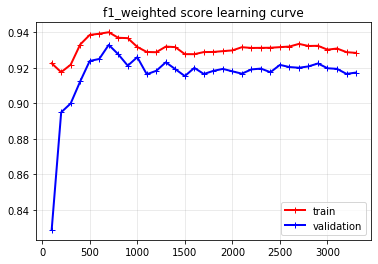

In [208]:
from sklearn.metrics import f1_score
f1_scores = stratFold(X_train, y_train, neural_net, f1_score, 
                      average="weighted")
plot_learning_curve(f1_scores[0], f1_scores[1], f1_scores[2], 
                    title="f1_weighted score learning curve")

In [210]:
# start with the best net from Assignment 1
best_net = MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(60, 60), learning_rate='invscaling',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

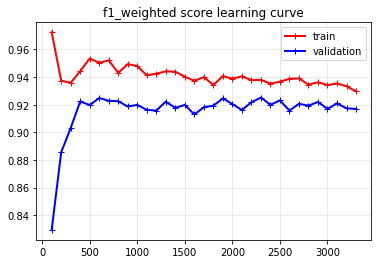

In [214]:
from sklearn.metrics import f1_score
f1_scores = stratFold(X_train, y_train, best_net, 
                      f1_score, average="weighted")

plot_learning_curve(f1_scores[0], f1_scores[1], f1_scores[2], 
                    title="f1_weighted score learning curve")

In [213]:
# check it with f1_weighted
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(30,30), (60,60), (90, 90)],
    "alpha" : [0.1, 0.01],
    'learning_rate': ['invscaling'],
}
search_f1 = GridSearchCV(MLPClassifier(), param_grid, cv=10, 
                         scoring='f1_weighted', n_jobs=-2)
search_f1.fit(X_train, y_train)

print(search_f1.best_estimator_, search_f1.best_score_)

# from sklearn.metrics import f1_score
# f1_scores = stratFold(train_X, train_y, search_f1.best_estimator_, 
#                       f1_score, average="weighted")
# plot_learning_curve(f1_scores[0], f1_scores[1], f1_scores[2], title="f1_scores")

MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 30), learning_rate='invscaling',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False) 0.9019475375827399


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   37.3s finished


[0.92044682 0.92374051 0.92620055 0.93180029 0.9332881 ] [0.91760546 0.917316   0.91673059 0.91490685 0.91699604] [(10, 10), (20, 20), (30, 30), (40, 40), (50, 50)]


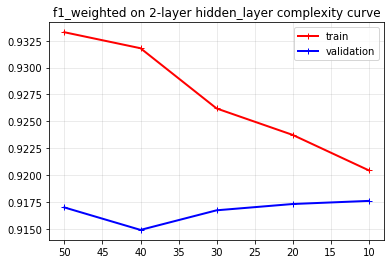

In [215]:
from sklearn.model_selection import validation_curve
params = [10,20,30,40,50]
param_range = [(10,10), (20,20), (30,30), (40,40), (50,50)]

train_scores, test_scores = validation_curve(
    best_net, X_train, y_train, param_name="hidden_layer_sizes", 
    param_range=param_range, scoring='f1_weighted', verbose=1, cv=5, n_jobs=-1
)
print(train_scores.mean(axis=1), test_scores.mean(axis=1), param_range)
plot_complexity(train_scores.mean(axis=1), test_scores.mean(axis=1), params, 
                title='f1_weighted on 2-layer hidden_layer complexity curve', inverse_x=True)

In [216]:
# start with the best net from Assignment 1
best_net_PCA = MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10), learning_rate='invscaling',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

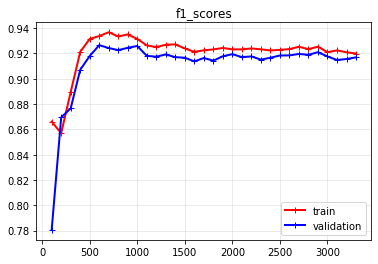

In [217]:
from sklearn.metrics import f1_score
f1_scores = stratFold(X_train, y_train, best_net_PCA, 
                      f1_score, average="weighted")
plot_learning_curve(f1_scores[0], f1_scores[1], f1_scores[2], title="f1_scores")

In [220]:
from sklearn.metrics import confusion_matrix
best_net_PCA.fit(X_train, y_train)
test_predictions = best_net_PCA.predict(X_test)
print(classification_report(y_test, test_predictions, digits=5))
print(confusion_matrix(y_test, test_predictions))

              precision    recall  f1-score   support

           1    0.93359   0.91747   0.92546       521
           2    0.92125   0.93373   0.92745       664
           3    0.92043   0.92043   0.92043       465

    accuracy                        0.92485      1650
   macro avg    0.92509   0.92388   0.92445      1650
weighted avg    0.92492   0.92485   0.92484      1650

[[478  27  16]
 [ 23 620  21]
 [ 11  26 428]]
